In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv
import shutil

In [2]:
import mloop.interfaces as mli
import mloop.controllers as mlc
import mloop.visualizations as mlv

In [3]:
np.random.seed(24)

In [4]:
np.set_printoptions(suppress=True)

A partir de um conjunto de pontos gerados da solução analítica, vamos analisar a convegência do fitting.

### Análise de uma curva

Vamos trabalhar com a curva em ```curves[0]```. Utilizamos a classe ```MOTinterface```, que, contém a rotina de ajuste dos parâmetros da curva.

In [5]:
from MOT2 import MOTinterface

Uma instância da interface requer apenas um argumento, ```simultaneous_fitting```, que determina se ```g``` e ```L``` serão ajustados simultaneamente após seus ajustes individuais. Seu valor padrão é ```True```.

In [6]:
def main(n1trust,n2trust,azero=None,bzero=None):
    """Creates an instance of the MOTinterface class, then
    a controller with that interface and a series of 
    configurations (that can be found in the M-LOOP 
    documentation). Lastly, the optimize() method is called
    to start the process."""
    interface = MOTinterface(n1trust,n2trust,azero,bzero)
    controller = mlc.create_controller(interface,
                                       num_params = 3,
                                       min_boundary = [1,0.1,2],
                                       max_boundary = [2,1,3],
                                       first_params = [1.15,0.4,2.6],
                                       max_num_runs = 1,
                                       cost_has_noise = True,
                                       no_delay = False)
    controller.optimize()
    
    return controller

Escrevemos os dados da curva no arquivo que o programa procura

In [7]:
n1s = [0.6]
n2s = [1.6]

INFO     Optimization started.
INFO     Run:1 (training)
INFO     params [1.15 0.4  2.6 ]


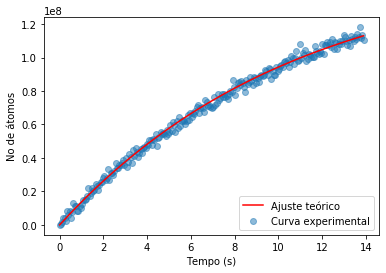

0.14014029078411255 [0.01505821]
0.08819294670104888 0.002961241525182818
0.0032515050792879634 0.003894332646113442
INFO     cost 0.14014029078411255 +/- 0.001
INFO     Controller finished. Closing down M-LOOP. Please wait a moment...
INFO     Optimization ended because:-
INFO     Maximum number of runs reached.
INFO     Results:-
INFO     Best parameters found:[1.15 0.4  2.6 ]
INFO     Best cost returned:0.14014029078411255 +/- 0.001
INFO     Best run number:1
INFO     Predicted best parameters:[1.15 0.4  2.6 ]
INFO     Predicted best cost:[0.14014029] +/- [0.00447214]
INFO     M-LOOP Done.


In [8]:
for n1,n2 in zip(n1s,n2s):
    shutil.copyfile('../data/MOT1pdbak.txt', '../data/MOT1pd.txt')
    main(n1,n2,False,False)

Na maioria dos casos ou b, ou a, vai claramente a 0, reforçando a proposta de definir um deles como 0 a priori. Entretanto, em alguns casos, os dois dão valores de ordem e-2 ou e-3 gerando bons ajustes. 

### Regimes a=0, b=0

In [9]:
shutil.copyfile('MOT1pdbak.txt', 'MOT1pd.txt')
main(0.1,0.2,True,False)

FileNotFoundError: [Errno 2] No such file or directory: 'MOT1pdbak.txt'

shutil.copyfile('MOT1pdbak.txt', 'MOT1pd.txt')
main(0.1,0.2,False,True)